In [ ]:
Shriya Parab
CSEDS
2021700044

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('/content/E-commerce Dataset.csv')
df

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2018-02-28,22:59:50,6.0,78489,Female,Mobile,Member,Home & Furniture,Shoe Rack,124.0,4.0,0.3,19.2,1.9,Medium,money_order
51286,2018-02-28,13:19:25,2.0,91941,Female,Mobile,Member,Home & Furniture,Umbrellas,70.0,5.0,0.2,14.0,1.4,Medium,credit_card
51287,2018-02-28,10:25:07,6.0,63313,Male,Web,Member,Home & Furniture,Dinner Crockery,133.0,1.0,0.3,39.7,4.0,Medium,credit_card
51288,2018-02-28,10:50:08,7.0,86485,Male,Web,Member,Home & Furniture,Sofa Covers,216.0,1.0,0.2,131.7,13.2,Medium,credit_card


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 

In [ ]:
# Convert date columns to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

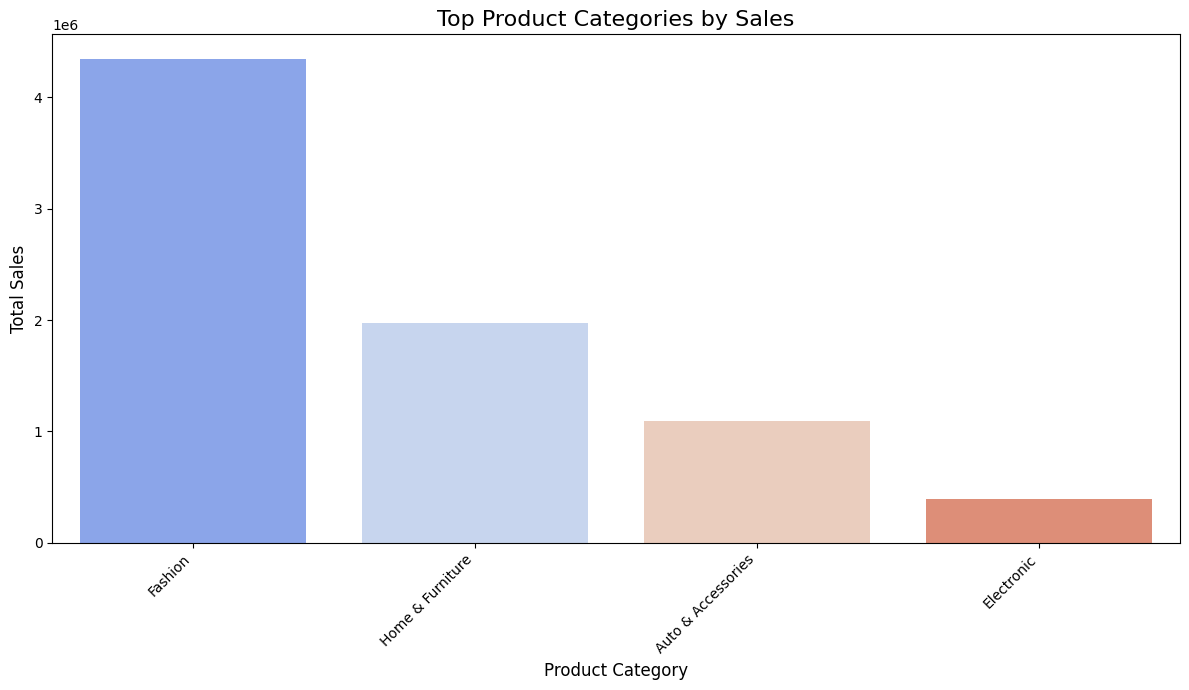

In [ ]:
# --- 1. Bar Chart: Top Product Categories by Sales ---
product_sales = df.groupby('Product_Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 7))
sns.barplot(x=product_sales.index, y=product_sales.values, palette="coolwarm")
plt.title('Top Product Categories by Sales', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The bar chart illustrates the total sales for different product categories. Here are some key observations:

Fashion Dominates Sales: The "Fashion" category has the highest sales, significantly outperforming all other categories, with total sales exceeding 4 million units.

Home & Furniture: This category ranks second in sales, with total sales between 2 and 3 million units. While it performs well, it lags behind the Fashion category.

Auto & Accessories: This category shows moderate sales, standing at around 1.5 million units, placing it in the third position.

Electronic: The "Electronic" category has the lowest sales among the categories displayed, with sales below 1 million units.

Sales Distribution: There is a clear gap between the categories, with Fashion leading by a large margin, followed by Home & Furniture, and then Auto & Accessories and Electronic.

This chart indicates that Fashion is the most popular product category by a substantial margin, with Home & Furniture and Auto & Accessories also showing notable sales, while the Electronic category has relatively lower sales.

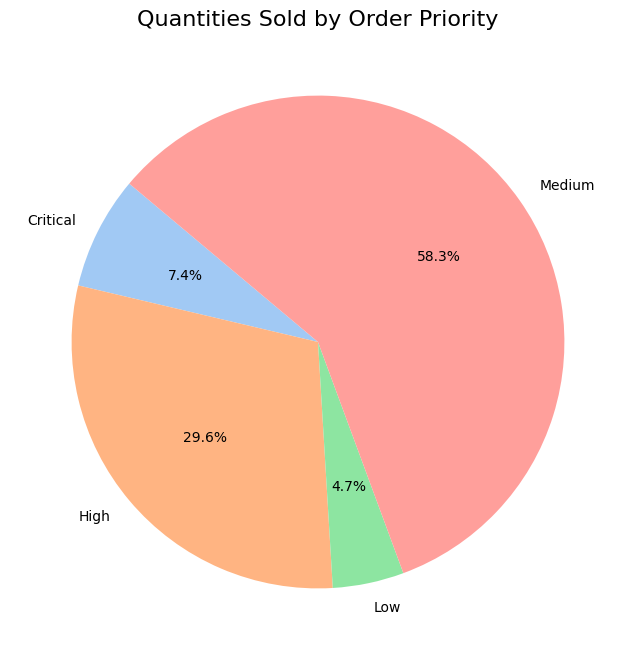

In [ ]:
# --- 2. Pie Chart: Sales Distribution by Payment Method ---
payment_sales = df.groupby('Order_Priority')['Quantity'].sum()

plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')

# Plotting the pie chart
plt.pie(payment_sales, labels=payment_sales.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Quantities Sold by Order Priority', fontsize=16)
plt.show()


The pie chart represents the percentage distribution of sales quantities across different order priority levels. Here are the observations:

Medium Priority Dominates: The majority of the quantities sold, 58.3%, are under the "Medium" order priority, indicating that most orders fall under this category.

High Priority: The "High" priority category accounts for 29.6% of the quantities sold, making it the second most common order priority.

Critical Priority: Only 7.4% of the quantities sold are under the "Critical" priority, suggesting that a smaller portion of orders are considered urgent.

Low Priority: The "Low" priority category represents the smallest share, with just 4.7% of the quantities sold, indicating that low-priority orders are relatively uncommon.

This chart indicates that the majority of sales are made under Medium and High priority orders, with Critical and Low priority orders being less frequent.

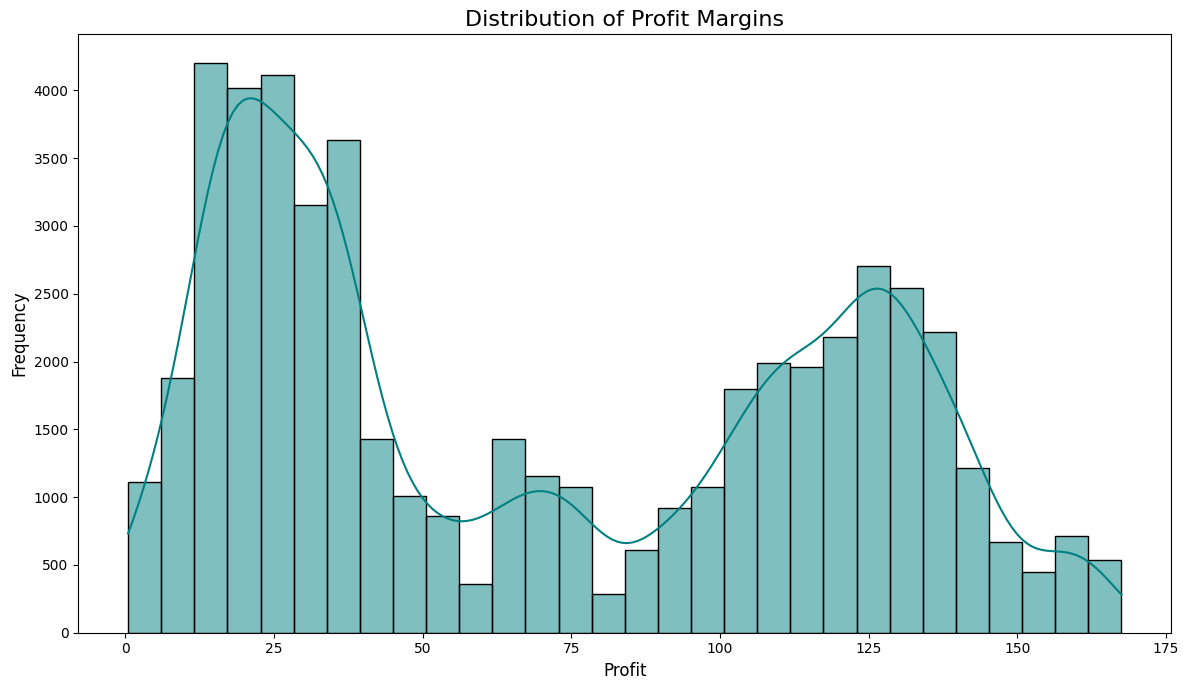

In [ ]:
# --- 3. Histogram: Distribution of Profit Margins ---
plt.figure(figsize=(12, 7))
sns.histplot(df['Profit'], kde=True, color='teal', bins=30)
plt.title('Distribution of Profit Margins', fontsize=16)
plt.xlabel('Profit', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

The histogram shows the frequency distribution of profit margins across different ranges. Here are some key observations:

Bimodal Distribution: The distribution of profit margins is bimodal, meaning it has two peaks. The first peak is around the 25% profit margin range, and the second peak is around the 125% profit margin range. This indicates two distinct groups where profit margins tend to cluster.

First Peak (0% - 50%): The first cluster of profit margins is between 0% and 50%, with the highest frequency around 25%. This range has the most frequent occurrence, indicating a significant number of products or transactions have profit margins within this range.

Second Peak (100% - 150%): The second cluster is between 100% and 150%, with the highest frequency around 125%. This suggests another group of products or transactions with considerably higher profit margins.

Low Frequency Between 50% - 100%: There is a noticeable dip in frequency between the two peaks, especially around the 75% profit margin range. This indicates that fewer products or transactions fall within this middle range of profit margins.

Spread of Distribution: The profit margins are spread across a wide range, from close to 0% up to around 175%. However, the frequency is much lower at the extremes (both very low and very high profit margins).

This chart suggests that the profit margins tend to be concentrated in two specific ranges (around 25% and 125%), with a lower frequency of margins in the middle range. This could imply different strategies or pricing models being applied to different segments of products or transactions.

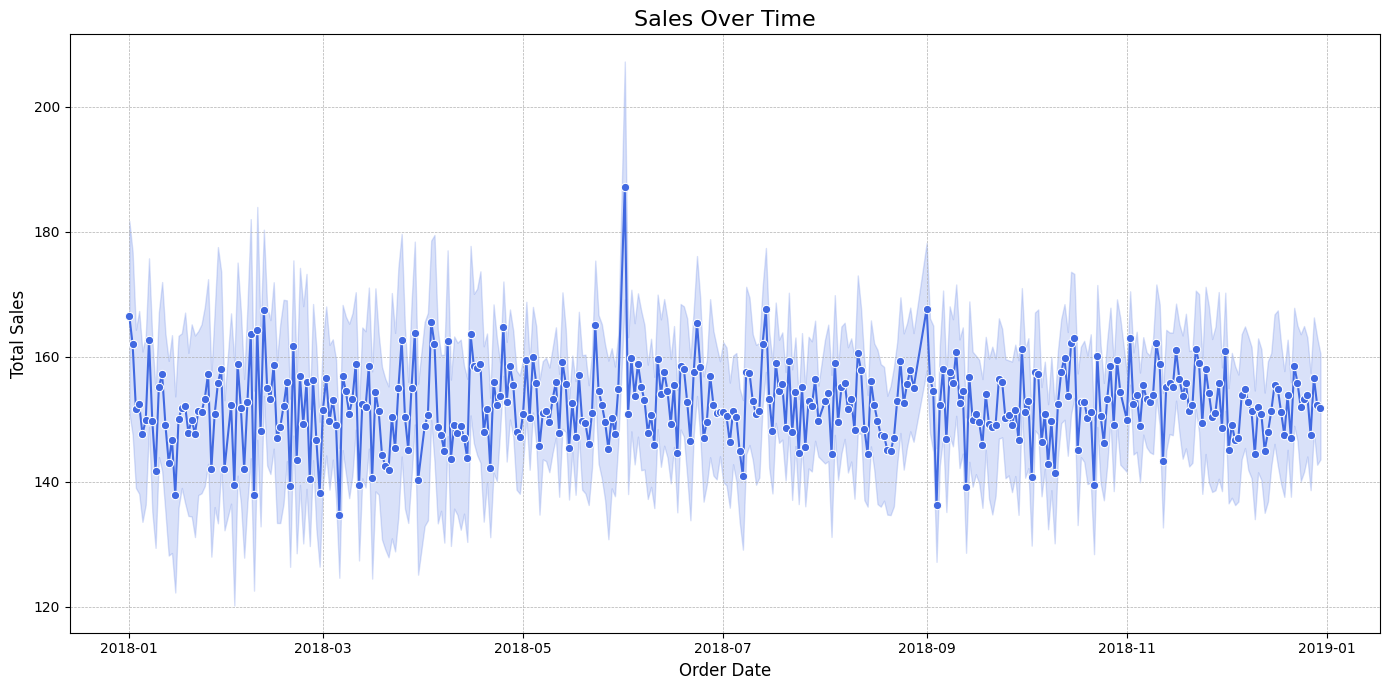

In [ ]:
# --- 4. Timeline Chart: Sales Over Time ---
plt.figure(figsize=(14, 7))
sns.lineplot(x='Order_Date', y='Sales', data=df, color='royalblue', marker='o')
plt.title('Sales Over Time', fontsize=16)
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()

The line chart shows sales over time here are some key Observations:

Steady Sales with Variability: The plot shows that sales are relatively steady over time, but there is variability within a certain range. The sales generally fluctuate between 120 and 200 units.

Notable Spikes: There are some prominent spikes in sales around mid-2018 (July), suggesting occasional periods of high demand. These could be driven by specific events such as promotions or seasonal trends.

Seasonal Patterns: While the sales remain relatively stable throughout, there could be an underlying seasonal trend, particularly around holidays or special events that cause sales to temporarily increase.

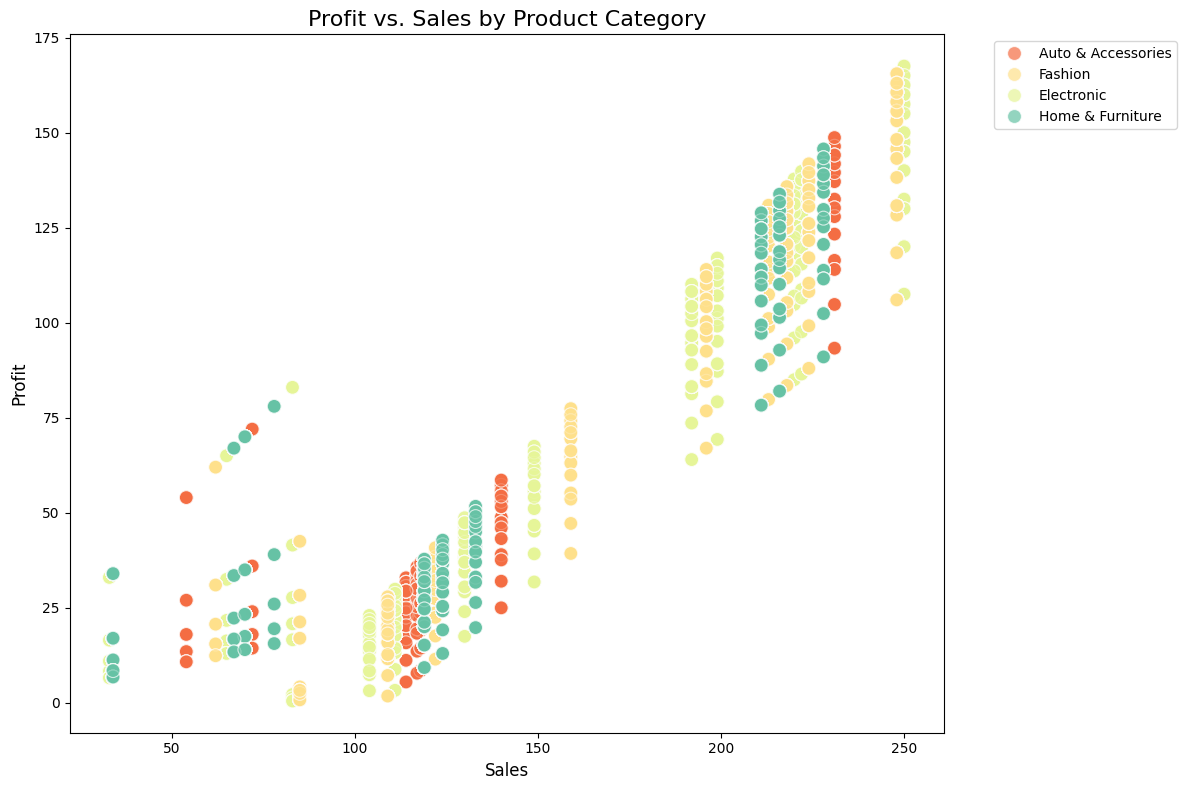

In [ ]:
# --- 5. Scatter Plot: Profit vs. Sales by Product Category ---
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Product_Category', palette='Spectral', s=100, alpha=0.7)
plt.title('Profit vs. Sales by Product Category', fontsize=16)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The scatter plot shoe distribution of profit along with sales here are some  Key Observations:

Strong Positive Correlation: There is a clear positive correlation between sales and profit, as expected. As sales increase, the profit tends to rise correspondingly.

Clustering by Category: The scatter plot shows distinct clustering for different product categories. For instance:
Auto & Accessories: Concentrated at lower sales but with moderate profits.
Fashion: Shows a wider distribution across both sales and profit.

Electronics: Appears to have higher sales, with corresponding higher profits.
Home & Furniture: Exhibits a similar trend to electronics but with a smaller spread.

High Sales, High Profit: The upper right cluster demonstrates that some products have both high sales and high profit, primarily in the Fashion and Electronics categories.


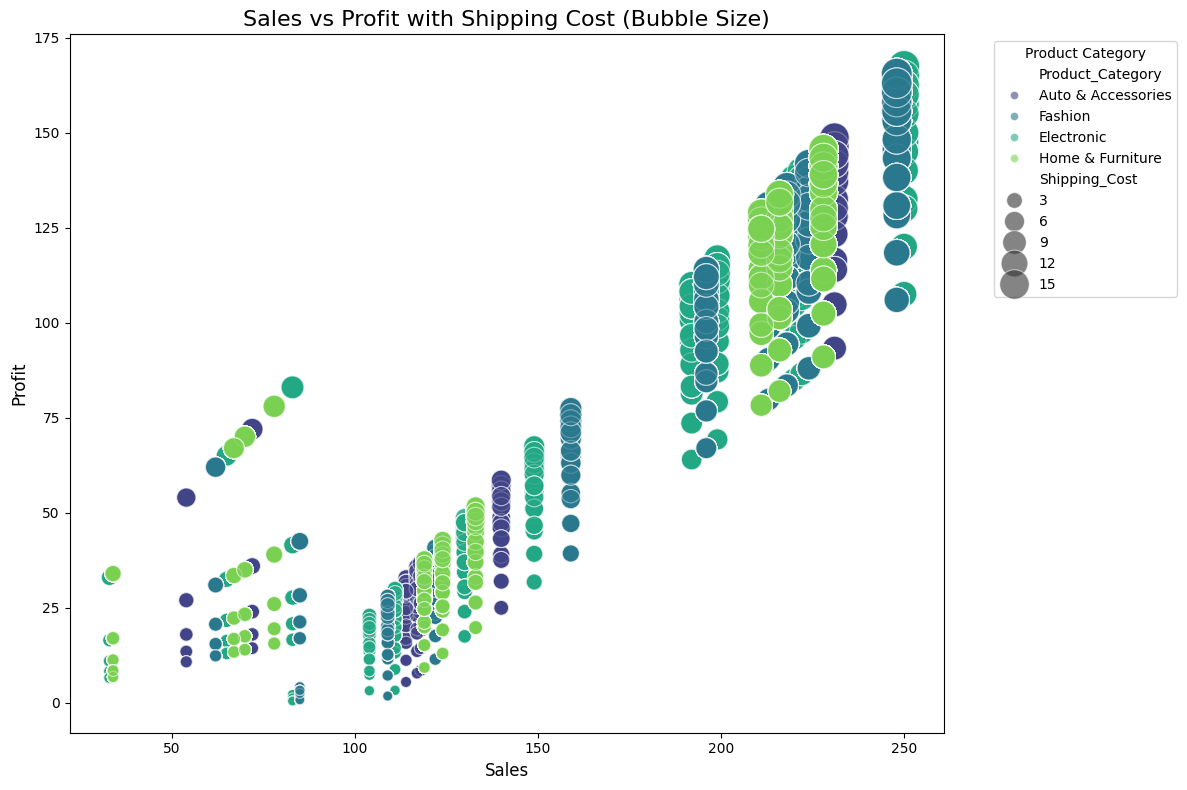

In [ ]:
# --- 6. Bubble Plot: Sales, Profit, and Shipping Cost ---
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Sales', y='Profit', size='Shipping_Cost', hue='Product_Category', palette='viridis', sizes=(50, 500), alpha=0.6)
plt.title('Sales vs Profit with Shipping Cost (Bubble Size)', fontsize=16)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Product Category")
plt.tight_layout()
plt.show()

The bubble chart shows sales along with profits associated with shipping cose.Key Observations are:

Sales and Profit Correlation: Similar to the scatter plot, this bubble plot shows a positive correlation between sales and profit. As sales increase, profits also tend to increase.

Bubble Size (Shipping Cost): The size of the bubbles represents the shipping cost. Larger bubbles indicate higher shipping costs.
Larger Shipping Costs are clustered in the lower sales and profit regions, which may suggest inefficiencies or increased shipping costs for smaller transactions.

Smaller Shipping Costs are found in transactions with higher sales and profit, indicating better optimization for larger shipments.

Product Categories: The plot color-codes the product categories, revealing that certain categories (like Fashion and Electronics) dominate the high sales and profit range, while categories like Auto & Accessories have smaller bubbles, indicating higher shipping costs for lower sales.

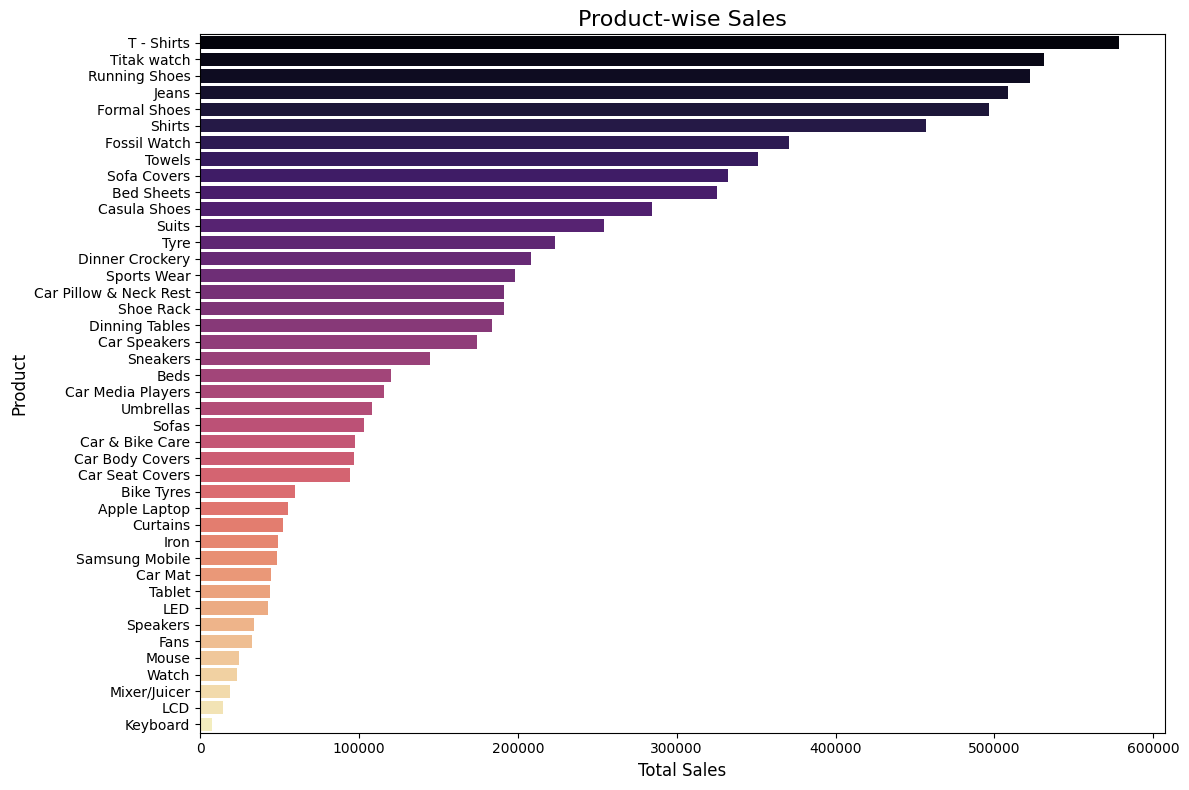

In [ ]:
# --- 7. Product-wise Sales ---
product_sales = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(y=product_sales.index, x=product_sales.values, palette="magma")
plt.title('Product-wise Sales', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.tight_layout()
plt.show()

The bar chart titled "Product-wise Sales" displays the sales data for various products. Here are the key observations:

Top-Selling Products:

T-Shirts are the highest-selling product, followed closely by Titan Watches and Running Shoes.
Other top-selling products include Jeans, Formal Shoes, and Shirts.
Middle Range Products:

Products like Fossil Watches, Sofa Covers, Bed Sheets, and Casual Shoes have moderate sales.
These products are significant contributors to the overall sales but are not among the highest.
Low-Selling Products:

Products such as LCDs, Keyboards, Mixer/Juicers, and Watches have the lowest sales figures.
These products might not be as popular or have lower demand compared to others.
Fashion Dominance:

Fashion items, including T-Shirts, Watches, and Shoes, dominate the top of the sales chart.
This suggests a strong consumer preference for fashion-related products.
Electronics and Accessories:

While some electronic products like Speakers and Tablets appear in the lower half of the chart, they do contribute a significant share but are not as strong as fashion items.
Diverse Product Categories:

The chart covers a wide range of product categories, from clothing and accessories to home items and electronics, indicating a diverse product offering.
This analysis suggests that fashion-related items are the most significant drivers of sales, with electronics and home-related products contributing moderately.













